# Supervised Machine Learning - Part 1

## Topics include: 
1. K-Nearest Neighbors
2. Linear Regression: Ridge, Lasso, and Polynomial Regression
3. Logistic Regression
4. Kernelized Support Vector Machines
5. Decision Tree
6. Cross-Validation
7. Connection between model complexity and generalization performance
8. Importance of proper feature scaling
9. Regularization to avoid overfitting 

## Goal:
To explore the relationship between model complexity and generalization performance<br>by adjusting key parameters of various supervised learning models. 
<br>Section 1 will focus on regression and Section 2 will focus on classification.

## Section 1: Regression

### 1. Fit a Polynomial LinearRegression Model for Different Degrees

1. Fit a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. 
2. For each model, find 100 predicted values over the interval x = 0 to 10 and store this in a numpy array.<br>Each row of this array should correspond to the output from the model trained on each degree. 

*This function will return a numpy array with shape `(4, 100)`*

<IPython.core.display.Javascript object>


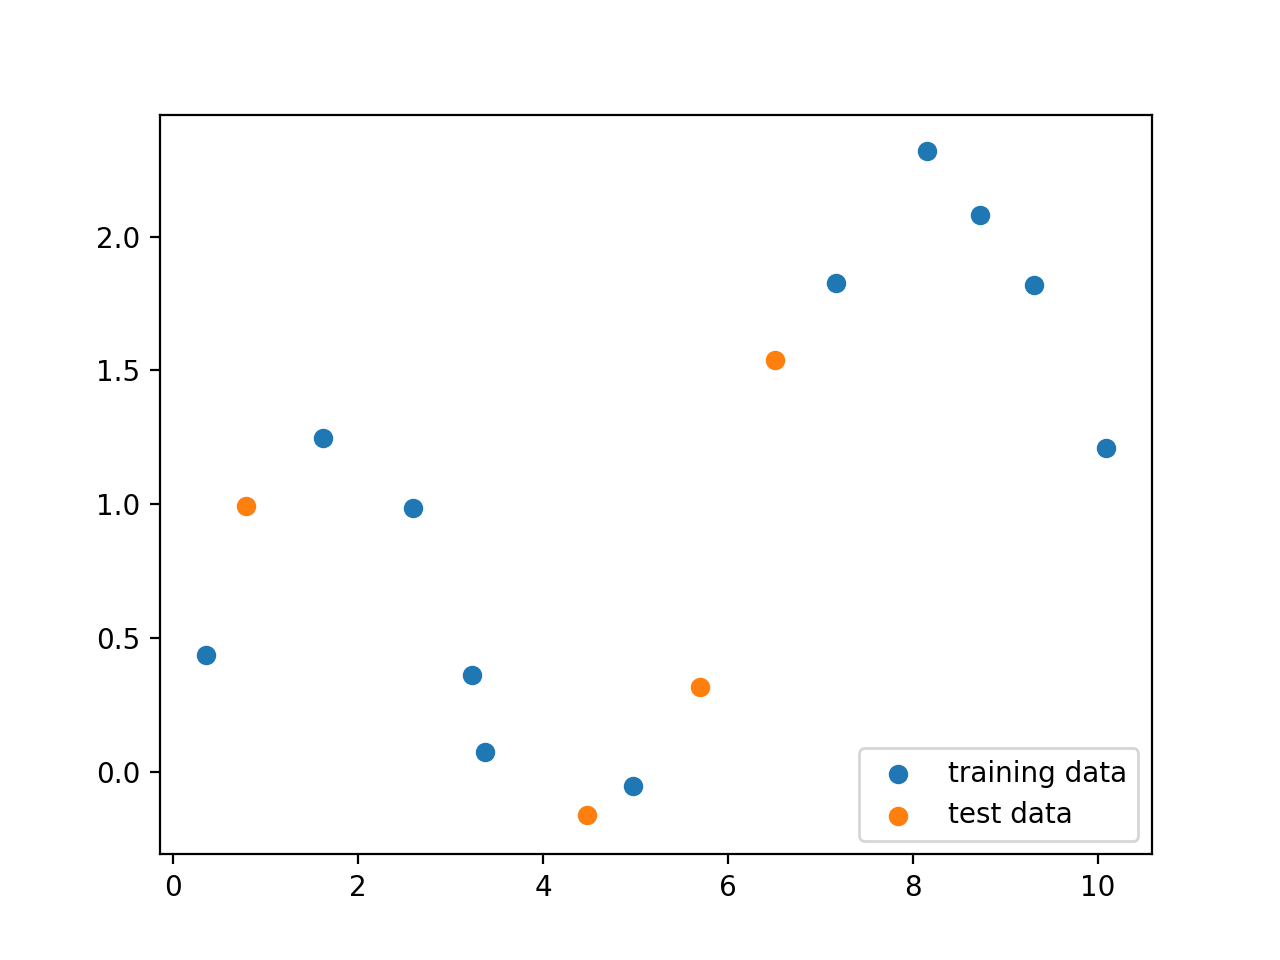

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# To visualize the dataset by plotting a scatterplot of the data points
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
part1_scatter()

In [2]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    results = np.empty((4,100))
    for i, degrees in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degrees)
        # reshape the X_train to match y_train
        X_poly = poly.fit_transform(X_train.reshape(len(X_train),1)) 
        linreg = LinearRegression().fit(X_poly, y_train)
        new_X = poly.fit_transform(np.linspace(0,10,100).reshape(100,1))
        y = linreg.predict(new_X)
        results[i,:] = y
    
    return results

<IPython.core.display.Javascript object>


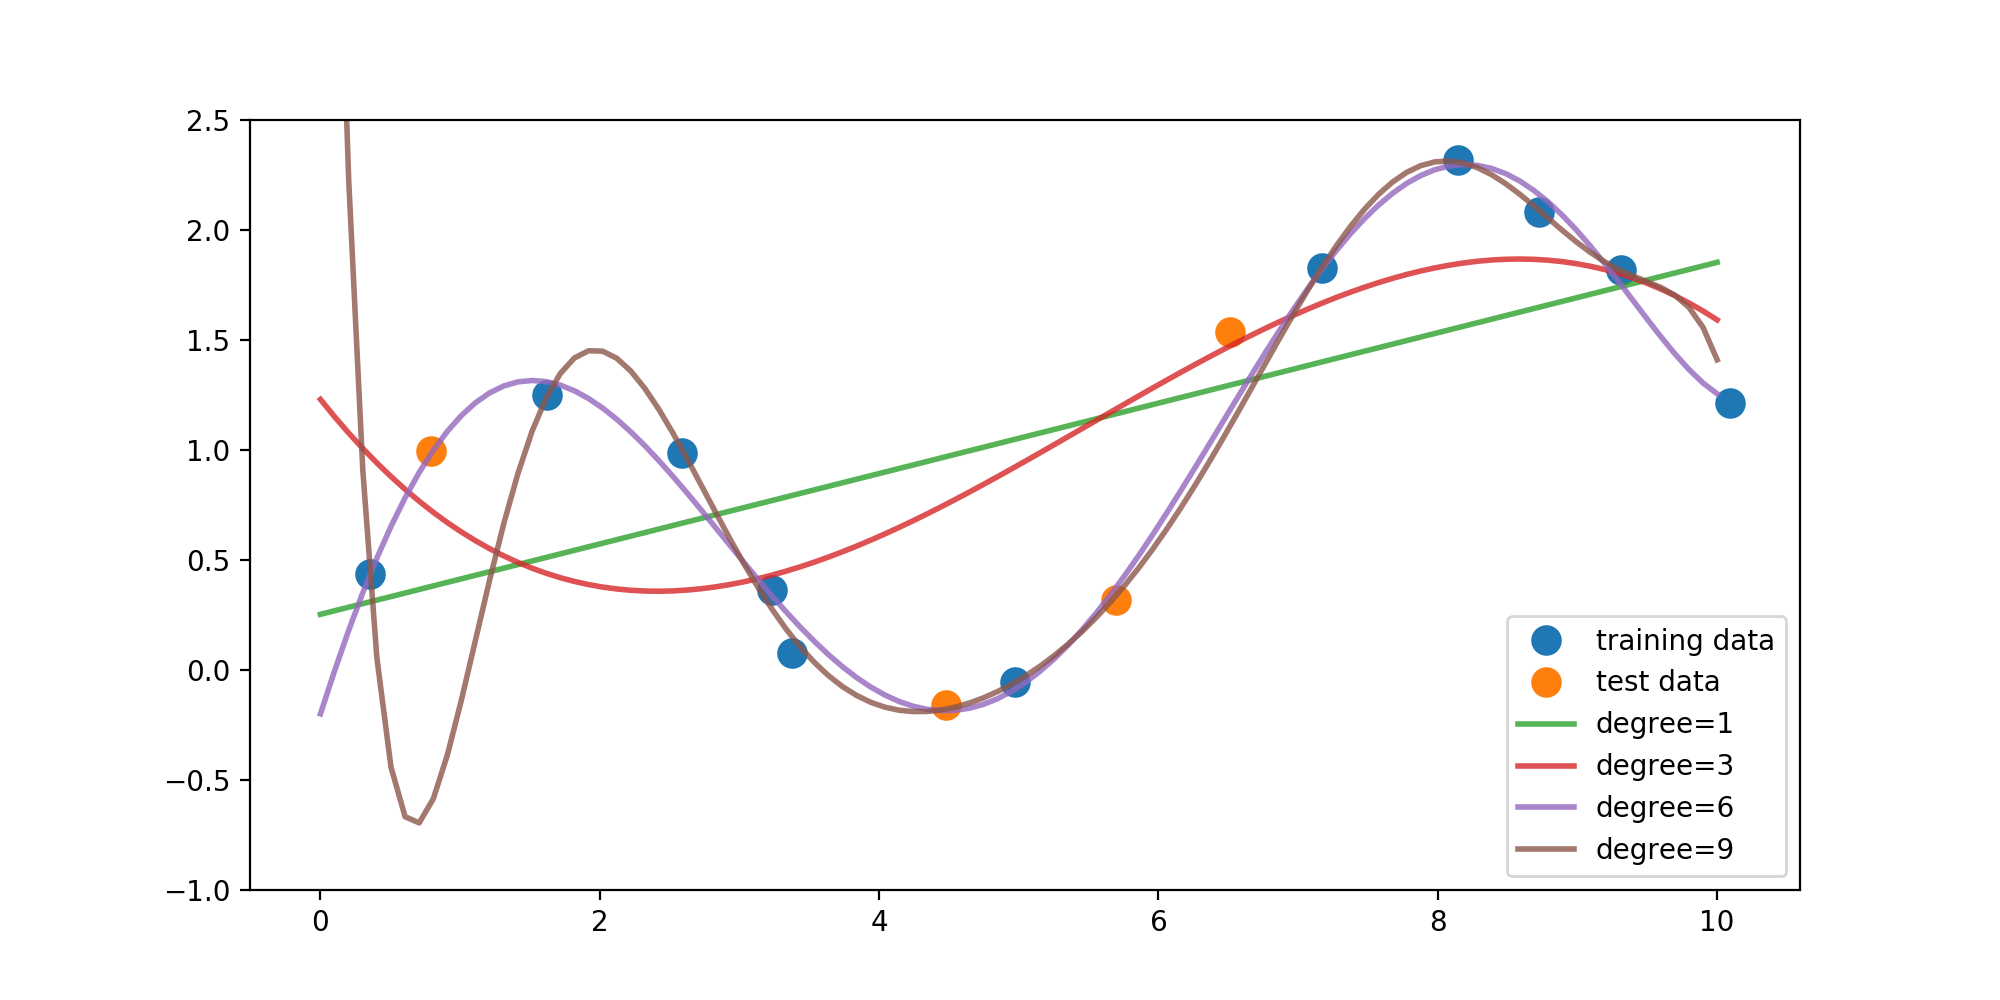

In [3]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i],\
                 alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### 2. Compute the $R^2$ Regression Score 

1. Fit a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. 
2. Compute the $R^2$ (coefficient of determination) regression score on the training data and the the test data for each model
3. Return both of these arrays in a tuple.

*This function will return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [4]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    r2_train = np.empty(10)
    r2_test = np.empty(10)
    
    for i in range(10):
        poly = PolynomialFeatures(i)
        X_poly = poly.fit_transform(X_train.reshape(len(X_train), 1))
        linreg = LinearRegression().fit(X_poly, y_train)
        r2_train[i] = linreg.score(X_poly, y_train) 
        X_test_poly = poly.transform(X_test.reshape(len(X_test),1))
        r2_test[i] = linreg.score(X_test_poly, y_test)
        

    return (r2_train, r2_test)

answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524777]))

### 3. Model Evaluation

Based on the $R^2$ scores from the above section (degree levels 0 through 9),<br>find each degree level corresponds to a model that is underfitting,<br>overfitting and has good generalization performance on this dataset


*This function will return one tuple with the degree values in this order:<br>`(Underfitting, Overfitting, Good_Generalization)`.* 

In [5]:
def answer_three():
    
    r2_train, r2_test = answer_two()
    r2_df = pd.DataFrame({'r2_train':r2_train, 'r2_test':r2_test})    
    
    underfitting = r2_df.sort_values(['r2_train']).index[0]
    # calculate the r-square difference between train and test and select the max and min
    r2_df['difference'] = r2_df['r2_train'] - r2_df['r2_test']
    overfitting = r2_df.sort_values(['difference']).index[-1]
    good_generalization = r2_df.sort_values(['difference']).index[0]
    
    return (underfitting, overfitting, good_generalization)

answer_three()

(0, 9, 6)

### 4. Non-regularized LinearRegression vs. Regularized Lasso Regression 

Training models on high degree polynomial features can result in overly complex models that overfit,<br>so regularized versions of the model are often used to constrain model complexity. 

1. Train two models: a non-regularized LinearRegression model (default parameters) and<br>a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`)<br>both on polynomial features of degree 12. 
2. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function will return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [6]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score

    poly = PolynomialFeatures(12) # create the poly object
    X_train_poly = poly.fit_transform(X_train.reshape(len(X_train),1))
    X_test_poly = poly.transform(X_test.reshape(len(X_test),1))
    
    # fit a non-regularized linear regression model 
    linreg = LinearRegression().fit(X_train_poly, y_train)
    y_pred_reg = linreg.predict(X_test_poly)
    LinearRegression_R2_test_score = r2_score(y_test, y_pred_reg)
    
    # fit a regularized lasso regression model
    linlass = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_poly, y_train)
    y_pred_lasso = linlass.predict(X_test_poly)
    Lasso_R2_test_score = r2_score(y_test, y_pred_lasso)
    
    
    return (LinearRegression_R2_test_score, Lasso_R2_test_score)

answer_four()

/Users/mumudreamer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.311980555741178, 0.8406625614750356)

## Section 2 - Classification

This section will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`.<br>The data will be used to train a model to predict whether or not a mushroom is poisonous. 

The data in the mushrooms dataset is currently encoded with strings.<br>`pd.get_dummies` will be used to convert the categorical variables into indicator variables. 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

### 5. Train a DecisionTreeClassifier and Find 5 Most Important Features

*This function will return a list of length 5 containing the feature names in descending order of importance.*

In [8]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    
    clf = DecisionTreeClassifier(random_state = 0).fit(X_train2, y_train2)
    # X_train2.columns property has the feature names
    # feature_importances_ property has feature importance
    # order of the features in X_train2.columns match the order of the feature importance values 
    data = list(zip(X_train2.columns, clf.feature_importances_))
        
    df = pd.DataFrame(data, columns = ['names','importance'])
    importance = df.sort_values(by = 'importance', ascending=False)
    features = importance['names'].tolist()[:5]

    return features

answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### 6. Support Vector Classifier with Varying Parameter Values

#### Goal: 
To use the `validation_curve` function in `sklearn.model_selection`<br>to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  

**Because creating a validation curve requires fitting multiple models,<br>for performance reasons, a subset of the original mushroom dataset will be used: variables X_subset and y_subset,<br>to reduce computation time.**

1. First, to create an `SVC` object with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`.  
2. Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find<br>the training and test scores for 6 values of `gamma` from `0.0001` to `10`. 
3. For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data,<br>returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.
4. Find the mean score across the three models for each level of `gamma` for both arrays,<br>creating two arrays of length 6, and return a tuple with the two arrays.

*This function will return one tuple of numpy arrays `(training_scores, test_scores)`<br>where each array in the tuple has shape `(6,)`.*

In [9]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    train_score, test_score = validation_curve(SVC(random_state=0), X_subset, y_subset,
                                                param_name='gamma',
                                                param_range=np.logspace(-4,1,6),
                                                scoring = 'accuracy')
    
    training_scores = np.mean(train_score, axis = 1)
    test_scores = np.mean(test_score, axis = 1)

    return (training_scores, test_scores)

answer_six()

(array([0.56647847, 0.93155951, 0.99039881, 1.        , 1.        ,
        1.        ]),
 array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
        0.52240279]))

### 7. Parameter Comparison

#### Goal:
Based on the scores from question 6, find what gamma value corresponds to a model<br>that is underfitting, overfitting, or has the best choice with good generalization performance on this dataset. 

*This function will return one tuple with the degree values in this order:<br>`(Underfitting, Overfitting, Good_Generalization)`.*

In [10]:
def answer_seven():
    
    train_scores, test_scores = answer_six()
    score_df = pd.DataFrame({'train_scores':train_scores, 
                             'test_scores':test_scores}, 
                             index = np.logspace(-4,1,6))
    
    underfitting = score_df.sort_values(['train_scores']).index[0]
    #calculate the r-square difference between train and test and select the max and min
    score_df['difference'] = score_df['train_scores'] - score_df['test_scores']
    overfitting = score_df.sort_values(['difference']).index[-1]
    good_generalization = score_df.sort_values(['difference']).index[0]
    
    return (underfitting, overfitting, good_generalization)

answer_seven()

(0.0001, 10.0, 0.0001)